<a href="https://colab.research.google.com/github/tithi-jha/Simple-Linear-Regression/blob/main/Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
df=pd.read_csv('height-weight.csv')

In [ ]:
df.head()


,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

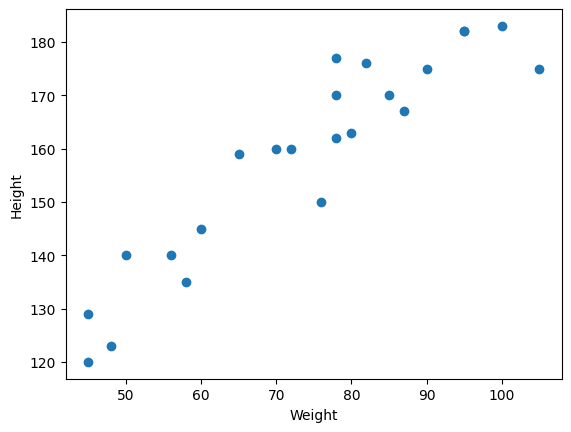

In [ ]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [ ]:
##Correlation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


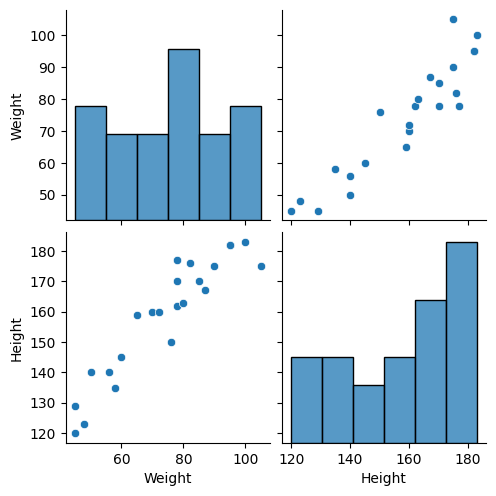

In [ ]:
##seaborn for visualization
import seaborn as sns
sns.pairplot(df)

In [ ]:
##independent and dependent features
X=df[['Weight']]## independent features need to be in data frame or 2D
Y=df['Height']## dependent features need to be in series or 1D

In [ ]:
X

,Weight
0,45
1,58
2,48
3,60
4,70
5,78
6,80
7,90
8,95
9,78


In [ ]:
Y

,Height
0,120
1,135
2,123
3,145
4,160
5,162
6,163
7,175
8,182
9,170


In [ ]:

np.array(Y).shape

(23,)

In [ ]:
np.array(X).shape

(23, 1)

In [ ]:
#Train Test Split
from sklearn.model_selection import train_test_split
#25% is test dataset
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25)

In [ ]:
X_train.shape

(17, 1)

In [ ]:
##Standardization
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)


In [ ]:
X_test=scaler.transform(X_test)
X_test


array([[-0.87778006],
       [ 1.71203385],
       [-1.67938913],
       [ 1.40372267],
       [ 0.91042478],
       [ 0.78710031]])

In [ ]:
##apply simple linear regression
## https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LinearRegression.html
from sklearn.linear_model import LinearRegression

In [ ]:
regression=LinearRegression()

In [ ]:
regression.fit(X_train,Y_train)

LinearRegression()

In [ ]:
print("Coefficient or slope:",regression.coef_)
print("Intercept:",regression.intercept_)

Coefficient or slope: [16.37356397]
Intercept: 157.47058823529412


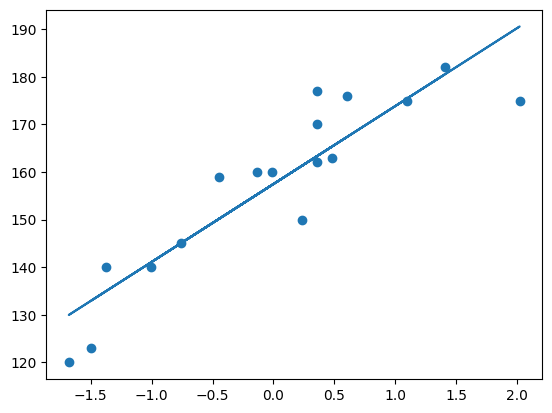

In [ ]:
##plot training data plot best fit line
plt.scatter(X_train,Y_train)
plt.plot(X_train,regression.predict(X_train)) ##gives best fit line

**Prediction of Test Data**

1.predicted height output=intercept+coef_(Weights)

2.Y_pred=154.0+18.74(X_test)

In [ ]:
##prediction of test data
y_pred=regression.predict(X_test)
y_pred,Y_test

(array([143.09820019, 185.50268393, 129.97300284, 180.4545311 ,
        172.37748658, 170.35822545]),
 1     135
 13    183
 20    129
 8     182
 19    167
 14    170
 Name: Height, dtype: int64)

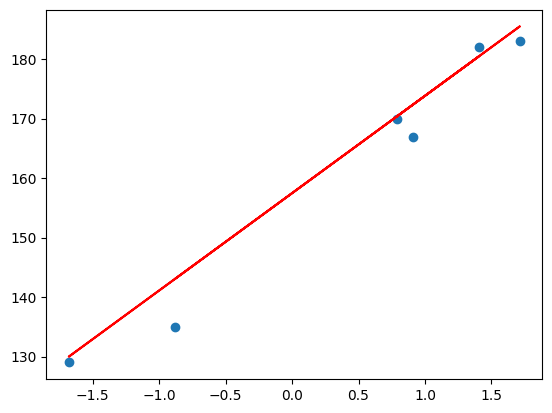

In [ ]:
plt.scatter(X_test,Y_test)
plt.plot(X_test,y_pred,'r')

In [ ]:
## performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
mse=mean_squared_error(Y_test,y_pred)
mae=mean_absolute_error(Y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

17.370861531967098
3.1425113145984653
4.16783655293332


**R Square**

Formula

**R^2=1-SSR/SST**

R^2= coeff of determination

SSR=sum of Square

SST=total sum of sqaures


In [ ]:
from sklearn.metrics import r2_score

In [ ]:
score=r2_score(Y_test,y_pred)
print(score)

0.9619893620744703


**Adjusted R-Squared = 1- [(1 – R^2) (n – 1)/ (n – k – 1)]**

where,

n: number of data points

k: number of independent variables

R: R-squared value

In [ ]:
## display adjusted r-squared
1-(1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.9524867025930879

In [ ]:
##OLS linear regression
import statsmodels.api as sm

In [ ]:
model=sm.OLS(Y_train,X_train).fit()

In [ ]:
model.predict(X_test)

array([-14.37238805,  28.03209569, -27.49758539,  22.98394287,
        14.90689835,  12.88763721])

In [ ]:
print(model.summary())


                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.011
Model:                            OLS   Adj. R-squared (uncentered):             -0.051
Method:                 Least Squares   F-statistic:                             0.1726
Date:                Sun, 03 Nov 2024   Prob (F-statistic):                       0.683
Time:                        11:59:19   Log-Likelihood:                         -110.15
No. Observations:                  17   AIC:                                      222.3
Df Residuals:                      16   BIC:                                      223.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
##prediction of new data
regression.predict([[72]])

array([1336.36719421])

In [ ]:
##above we can see for weight 72 we get height 1307 which is impossible so we need to standardize
regression.predict(scaler.transform([[72]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([157.2330281])

**Assumptions to know if model working good**

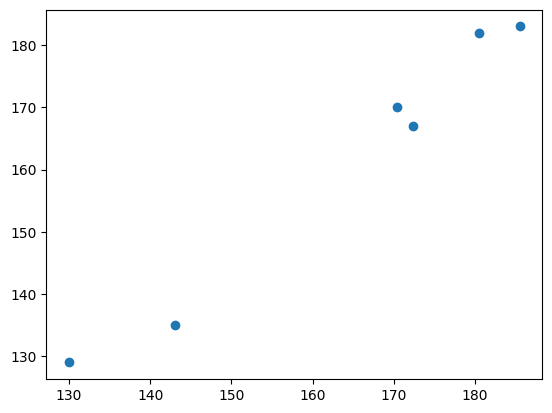

In [ ]:
# 1. plot a scatter plot and if it linearly distributed means its good
plt.scatter(y_pred,Y_test)

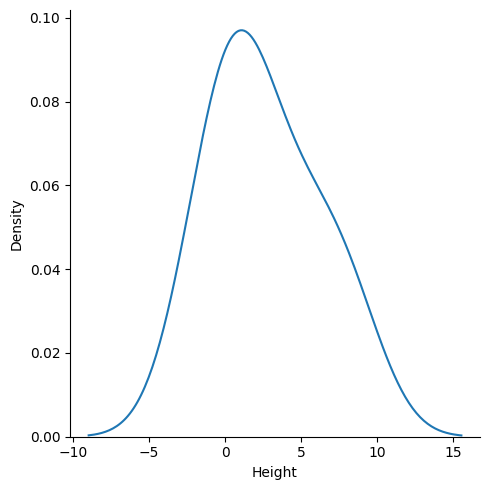

In [ ]:
#2. calculate residuals
residuals=y_pred-Y_test
residuals
import seaborn as sns
sns.displot(residuals,kind='kde')
#if normally distributed means its good

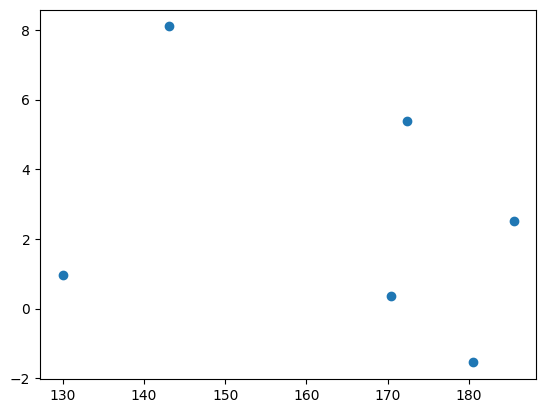

In [ ]:
#3. plot between prediction and residuals
plt.scatter(y_pred,residuals)
#If uniformly distributed means good